In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
sns.set_theme()

clearview = open('logs/sample_clearview.json')
clearview_data = json.load(clearview)

dehazenet = open('logs/sample_dehazenet.json')
dehazenet_data = json.load(dehazenet)

# Performance Evaluations
Peformance evaluations on NYU's D-Hazy Dataset for approximately 15000 iterations.

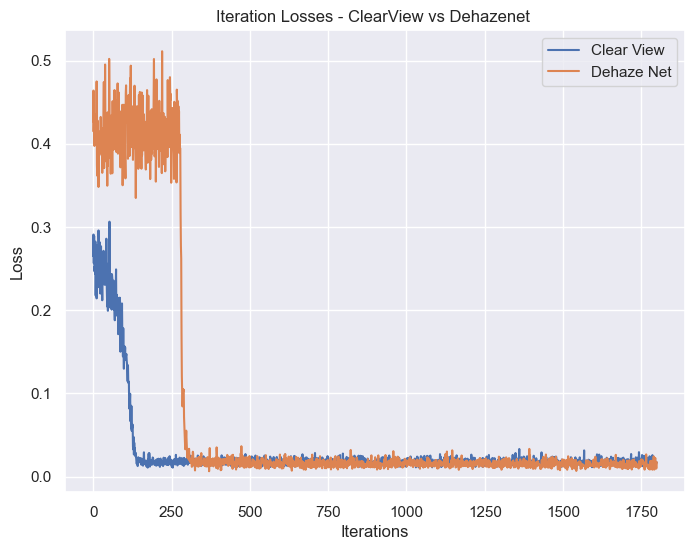

In [24]:
plt.figure(figsize=(8,6))
plt.plot(clearview_data["iteration_losses"][:1800], label = "Clear View")
plt.plot(dehazenet_data["iteration_losses"][:1800], label = "Dehaze Net")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Iteration Losses - ClearView vs Dehazenet ")
plt.savefig("plots/training_losses")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


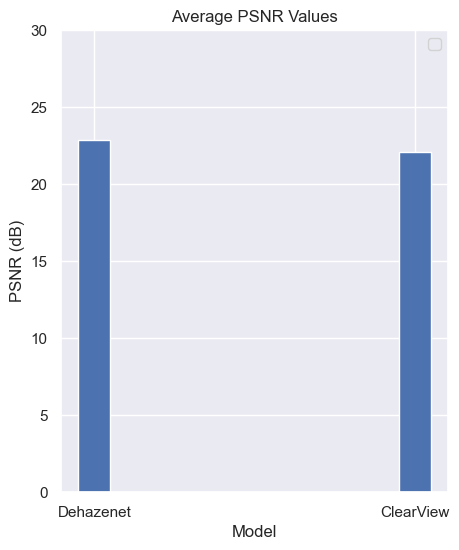

In [29]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,6))
x = ["Dehazenet", "ClearView"]
X_axis = np.arange(len(x))
timing_bar = [np.mean(dehazenet_data["psnr_values"]), np.mean(clearview_data["psnr_values"])]

plt.bar(X_axis, timing_bar, width=0.1)
plt.ylim([0, 30])
plt.legend()
plt.xlabel("Model")
plt.xticks(X_axis, x)
plt.ylabel("PSNR (dB)")
plt.title("Average PSNR Values")
plt.savefig("plots/avg_psnr")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


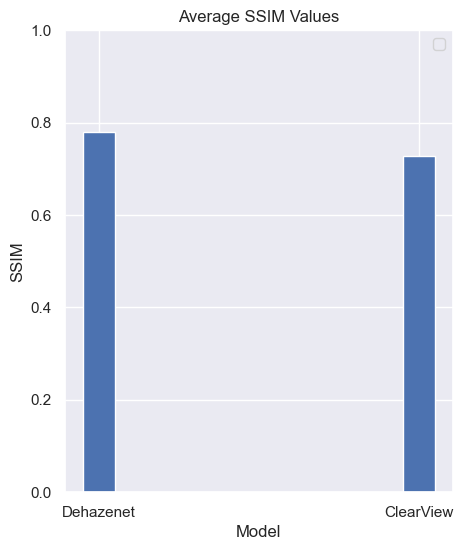

In [30]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,6))
x = ["Dehazenet", "ClearView"]
X_axis = np.arange(len(x))
timing_bar = [np.mean(dehazenet_data["ssim_values"]), np.mean(clearview_data["ssim_values"])]

plt.bar(X_axis, timing_bar, width=0.1)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Model")
plt.xticks(X_axis, x)
plt.ylabel("SSIM")
plt.title("Average SSIM Values")
plt.savefig("plots/avg_ssim")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


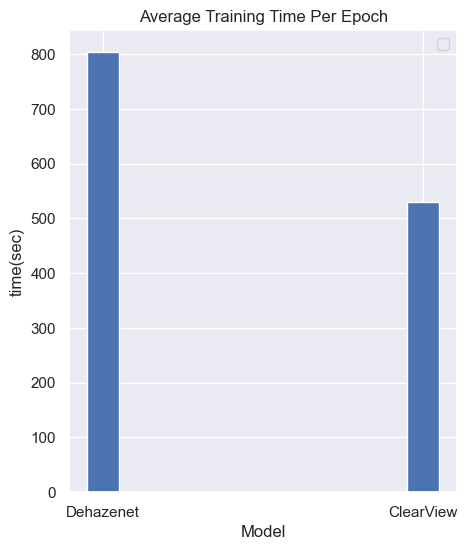

In [31]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,6))
x = ["Dehazenet", "ClearView"]
X_axis = np.arange(len(x))
timing_bar = [np.mean(dehazenet_data["training_times"]), np.mean(clearview_data["training_times"])]

plt.bar(X_axis, timing_bar, width=0.1)
plt.legend()
plt.xlabel("Model")
plt.xticks(X_axis, x)
plt.ylabel("time(sec)")
plt.title("Average Training Time Per Epoch")
plt.savefig("plots/avg_training_time")

# Real-World Image Testing
Testing real-world images using our trained model

In [45]:
import torch
from model import ClearView
import torchvision
from PIL import Image
import matplotlib.image as mpimg


def process(image_path):
    hazy_image = Image.open(image_path)
    hazy_image = (np.asarray(hazy_image) / 255.0)
    hazy_image = torch.from_numpy(hazy_image).float()
    hazy_image = hazy_image.permute(2, 0, 1)
    hazy_image = hazy_image.cuda().unsqueeze(0)
    model = ClearView().cuda()
    model.load_state_dict(torch.load('snapshots/clearview.pth'))

    outputs = model(hazy_image)
    torchvision.utils.save_image(torch.cat((hazy_image, outputs), 0), "sample_results/" + image_path.split("/")[-1])
    return outputs.cpu()

Text(0.5, 1.0, 'Before and After Image comparision')

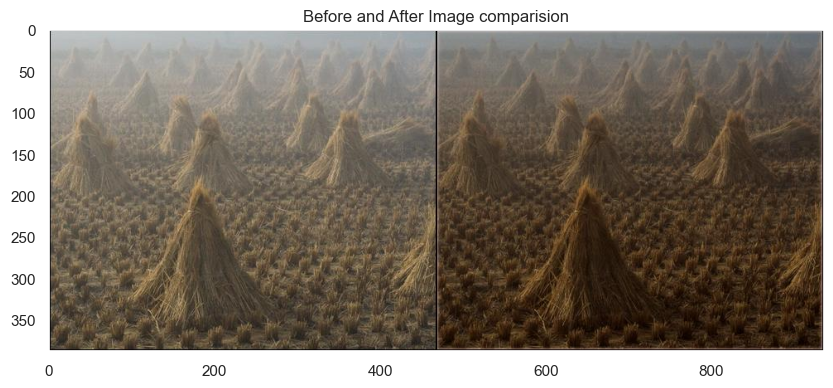

In [57]:
sample_image = "sample_images/sample4.JPG"

clean = process(sample_image)

plt.figure(figsize=(10,6))
img = mpimg.imread("sample_results/sample4.JPG")
plt.grid(False)
plt.imshow(img)
plt.title("Before and After Image comparision")